In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV,  train_test_split, validation_curve, learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import graphviz 
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import time

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [17]:
seed = 42

In [18]:
# Loading breast cancer dataset
bc = load_breast_cancer()
X_1 = bc.data
y_1 = bc.target
bc_df = pd.DataFrame(data=X_1, columns=bc.feature_names)
bc_df['label'] = y_1

# Loading diabetes dataset
dia_df = pd.read_csv('/Users/irenekim/Desktop/Personal/GaTech/ML/CS7641-Machine-Learning/HW1/Data/diabetes.csv')
X_2 = dia_df.iloc[:, :-1]
y_2 = dia_df.iloc[:, -1]

In [19]:
print(bc_df['label'].value_counts())
print(y_2.value_counts())

1    357
0    212
Name: label, dtype: int64
0    500
1    268
Name: Outcome, dtype: int64


#### Check & Preprocess Dataset

In [5]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)

print(X_1.mean())
print(X_2.mean())
print(X_1.var())
print(X_2.var())

-6.118909323768877e-16
8.86154575644819e-17
1.0
1.0


In [21]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2, random_state=seed)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, stratify=y_2, test_size=0.2, random_state=seed)

print(X_1_train.shape, X_1_test.shape)
print(X_2_train.shape, X_2_test.shape)

(455, 30) (114, 30)
(614, 8) (154, 8)


In [22]:
print(X_1.mean())
print(X_2.mean())
print(X_1.var())
print(X_2.var())

-6.118909323768877e-16
8.86154575644819e-17
1.0
1.0


In [23]:
def val_curve(clf, X, y, param_name, param_range, cv = 5, title = 'Val Curve'):
    train_scores, test_scores = validation_curve(clf, X, y, param_name=param_name, param_range=param_range, cv=cv, scoring="accuracy", n_jobs=-1)
    train_mean, train_std  = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, label="Training Acc", color = 'grey')
    plt.plot(param_range, test_mean, label="CV Acc", color = 'darkred')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.grid(None) 
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    best_idx = np.where(test_mean == test_mean.max())
    best_param = param_range[best_idx]
    print('Best parameter values: ')
    print(best_param)



def LR_curve(clf, X, y, cv = 5, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, scoretime = learning_curve(clf, X, y, cv=cv, scoring="accuracy", n_jobs=-1,  
                                                                        train_sizes=np.linspace(0.01, 1.0, 100), return_times = True,
                                                                        random_state = seed)

    train_mean, train_std = np.mean(train_scores, axis=1),  np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)
    train_times_mean, train_times_std = np.mean(fit_times, axis=1),  np.std(fit_times, axis=1)
    
    # Learning Curve
    plt.figure()
    plt.grid(None)
    plt.plot(train_sizes, train_mean, label="Training Acc", color = 'grey')
    plt.plot(train_sizes, test_mean, label="CV score", color = 'orange')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title(title)
    plt.xlabel("Size of Training set"), plt.ylabel("Accuracy"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # Scalabilty
    plt.figure()
    plt.grid(None)
    plt.plot(train_sizes, train_times_mean, color = 'darkgrey')
    plt.title('Training Scalability')
    plt.xlabel('Size of Training set')
    plt.ylabel('Time Duration(s)')
    plt.grid()
    plt.show()

def evaluate(y_test, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred_prob)
    recall = recall_score(y_test, y_pred_prob)
    precision= precision_score(y_test, y_pred_prob)
    confusion = confusion_matrix(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print('Accuracy: {0:.3f}'.format(accuracy))
    print('f1: {0:.3f}'.format(f1))
    print('recall: {0:.3f}'.format(recall))
    print('precision: {0:.3f}'.format(precision))
    print('rocauc: {0:.3f}'.format(roc_auc))
    print(confusion)


In [24]:
training_time = np.zeros(5)
inference_time = np.zeros(5)

training_time_2 = np.zeros(5)
inference_time_2 = np.zeros(5)

#### Algorithms

Decision Tree - Before Pruning

In [102]:
dt_clf_1 = DecisionTreeClassifier()
dt_clf_2 = DecisionTreeClassifier()

In [103]:
dt_clf_1.fit(X_1_train, y_1_train)
y_pred = dt_clf_1.predict(X_1_test)
evaluate(y_pred, y_1_test)


dt_clf_2.fit(X_2_train, y_2_train)
y_pred_2 = dt_clf_2.predict(X_2_test)
evaluate(y_pred_2, y_2_test)

Accuracy: 0.965
f1: 0.972
recall: 0.986
precision: 0.958
rocauc: 0.959
[[41  3]
 [ 1 69]]
Accuracy: 0.695
f1: 0.591
recall: 0.557
precision: 0.630
rocauc: 0.671
[[73 20]
 [27 34]]


In [104]:
tree.plot_tree(dt_clf_1)

[Text(0.7418478260869565, 0.9444444444444444, 'X[23] <= -0.026\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.5706521739130435, 0.8333333333333334, 'X[27] <= 0.696\ngini = 0.172\nsamples = 306\nvalue = [29, 277]'),
 Text(0.44565217391304346, 0.7222222222222222, 'X[27] <= 0.323\ngini = 0.092\nsamples = 290\nvalue = [14, 276]'),
 Text(0.32608695652173914, 0.6111111111111112, 'X[13] <= 1.127\ngini = 0.037\nsamples = 266\nvalue = [5, 261]'),
 Text(0.2826086956521739, 0.5, 'X[13] <= -0.038\ngini = 0.03\nsamples = 265\nvalue = [4, 261]'),
 Text(0.17391304347826086, 0.3888888888888889, 'X[14] <= -1.249\ngini = 0.016\nsamples = 254\nvalue = [2, 252]'),
 Text(0.08695652173913043, 0.2777777777777778, 'X[22] <= -0.221\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.043478260869565216, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.13043478260869565, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2608695652173913, 0.277777777777

Error in callback <function flush_figures at 0x7f9f40ef61f0> (for post_execute):


KeyboardInterrupt: 

[Text(0.4957848837209302, 0.96875, 'X[1] <= 0.739\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.1997093023255814, 0.90625, 'X[5] <= -0.589\ngini = 0.362\nsamples = 476\nvalue = [363, 113]'),
 Text(0.06976744186046512, 0.84375, 'X[2] <= 1.287\ngini = 0.081\nsamples = 142\nvalue = [136, 6]'),
 Text(0.05116279069767442, 0.78125, 'X[1] <= -0.451\ngini = 0.069\nsamples = 140\nvalue = [135, 5]'),
 Text(0.04186046511627907, 0.71875, 'gini = 0.0\nsamples = 80\nvalue = [80, 0]'),
 Text(0.06046511627906977, 0.71875, 'X[6] <= -0.566\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(0.037209302325581395, 0.65625, 'X[6] <= -0.664\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.018604651162790697, 0.59375, 'X[3] <= 0.468\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.009302325581395349, 0.53125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.027906976744186046, 0.53125, 'X[5] <= -0.742\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.018604651162790697, 

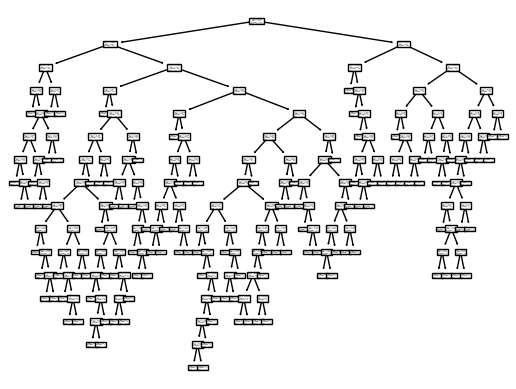

In [ ]:
tree.plot_tree(dt_clf_2)

Decision Tree - Post Pruning

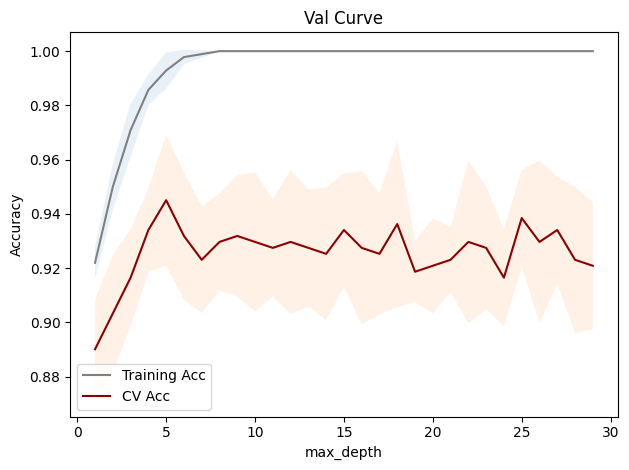

Best parameter values: 
[5]


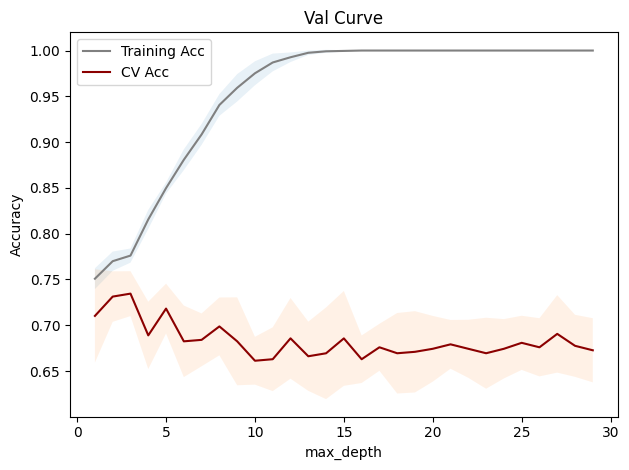

Best parameter values: 
[3]


In [ ]:
val_curve(dt_clf_1, X_1_train, y_1_train, 'max_depth', np.arange(1,30), cv =5)
val_curve(dt_clf_2, X_2_train, y_2_train, 'max_depth', np.arange(1,30), cv =5)
#plt.savefig('Depth_BreastCancer_DT.png')

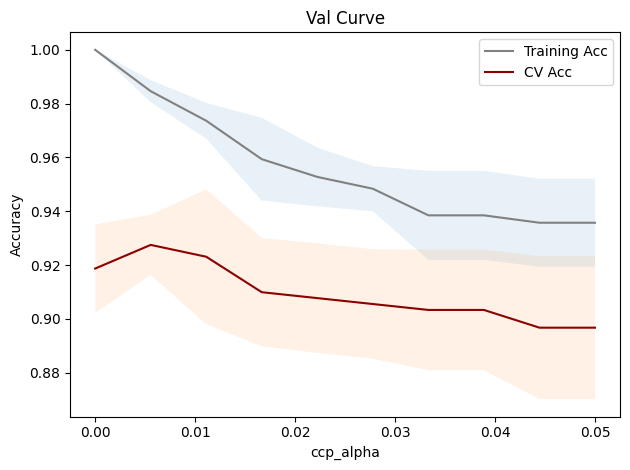

Best parameter values: 
[0.00555556]


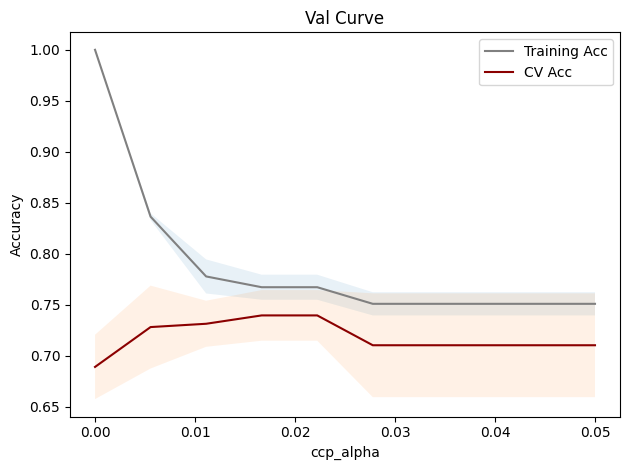

Best parameter values: 
[0.01666667 0.02222222]


In [ ]:
val_curve(dt_clf, X_1_train, y_1_train, 'ccp_alpha', np.linspace(0,0.05,10), cv =5)
val_curve(dt_clf, X_2_train, y_2_train, 'ccp_alpha', np.linspace(0,0.05,10), cv =5)

In [ ]:
# val_curve(dt_clf, X_1_train, y_1_train, 'min_samples_split', np.arange(0,30,1), cv =5)
# val_curve(dt_clf, X_2_train, y_2_train, 'min_samples_split', np.arange(0,30,1), cv =5)

In [8]:
dt_clf_best = DecisionTreeClassifier(max_depth=5, ccp_alpha = 0.00555556)
dt_clf_best_2 = DecisionTreeClassifier(max_depth=3, ccp_alpha = 0.02222222)

start_time = time.time()
dt_clf_best.fit(X_1_train, y_1_train)
end_time = time.time()
training_time[0] = end_time-start_time

start_time = time.time()
y_pred = dt_clf_best.predict(X_1_test)
end_time = time.time()
inference_time[0] = end_time-start_time


start_time = time.time()
dt_clf_best_2.fit(X_2_train, y_2_train)
end_time = time.time()
training_time_2[0] = end_time-start_time

start_time = time.time()
y_pred_2 = dt_clf_best_2.predict(X_2_test)
end_time = time.time()
inference_time_2[0] = end_time-start_time

In [ ]:
evaluate(y_pred, y_1_test)
evaluate(y_pred_2, y_2_test)


Accuracy: 0.974
f1: 0.979
recall: 0.986
precision: 0.972
rocauc: 0.970
[[41  2]
 [ 1 70]]
Accuracy: 0.721
f1: 0.494
recall: 0.677
precision: 0.389
rocauc: 0.705
[[90 33]
 [10 21]]


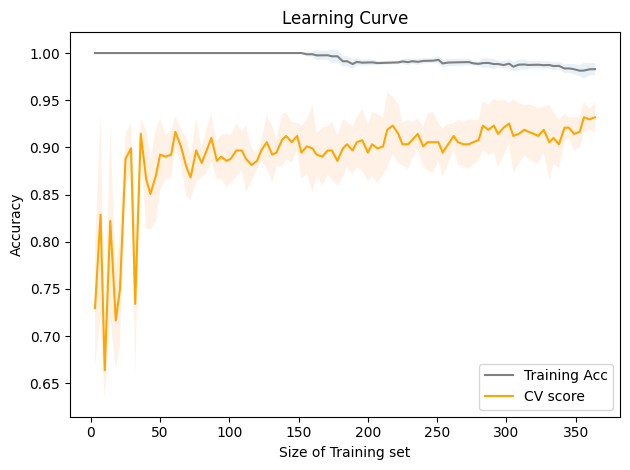

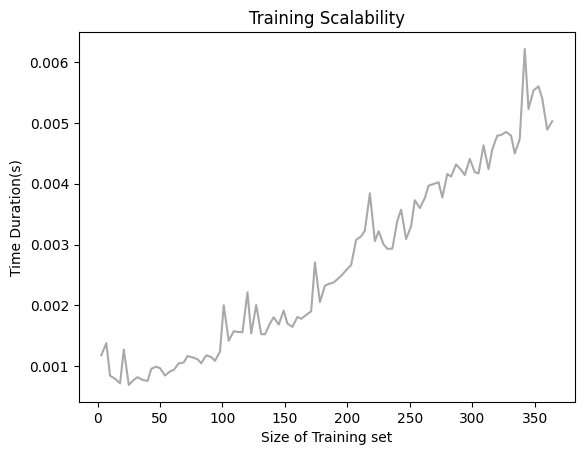

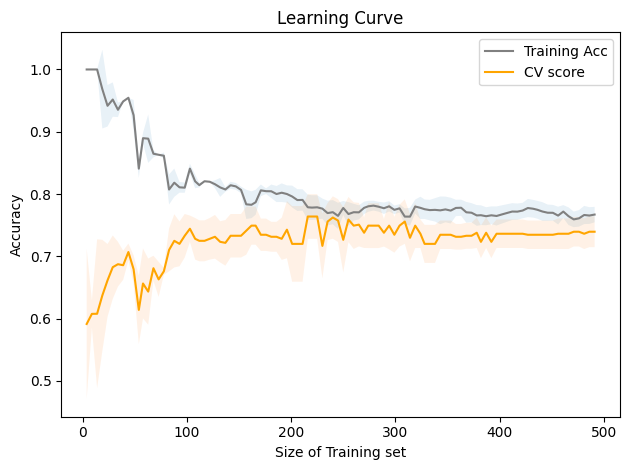

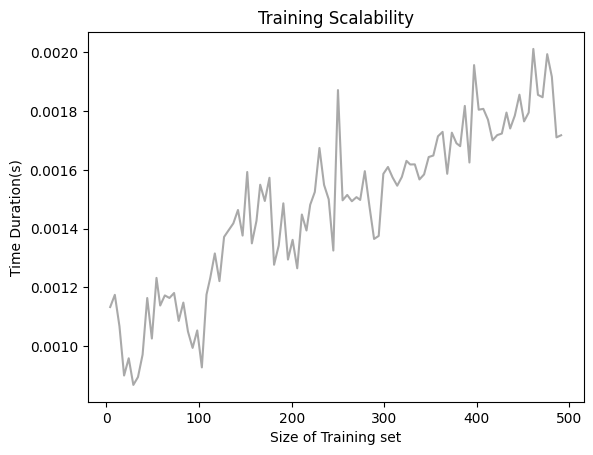

In [ ]:
LR_curve(dt_clf_best, X_1_train, y_1_train)
LR_curve(dt_clf_best_2, X_2_train, y_2_train)

[Text(0.5555555555555556, 0.9166666666666666, 'X[23] <= -0.026\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.3333333333333333, 0.75, 'X[27] <= 0.696\ngini = 0.172\nsamples = 306\nvalue = [29, 277]'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[27] <= 0.323\ngini = 0.092\nsamples = 290\nvalue = [14, 276]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.037\nsamples = 266\nvalue = [5, 261]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[21] <= 0.505\ngini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(0.2222222222222222, 0.25, 'X[23] <= -0.122\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.7777777

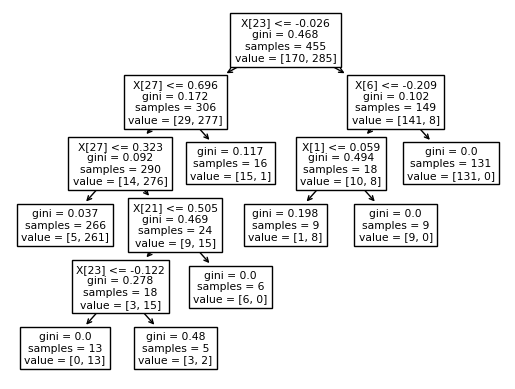

In [ ]:
tree.plot_tree(dt_clf_best)

[Text(0.6, 0.8333333333333334, 'X[1] <= 0.739\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.4, 0.5, 'X[5] <= -0.589\ngini = 0.362\nsamples = 476\nvalue = [363, 113]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.081\nsamples = 142\nvalue = [136, 6]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.435\nsamples = 334\nvalue = [227, 107]'),
 Text(0.8, 0.5, 'gini = 0.392\nsamples = 138\nvalue = [37, 101]')]

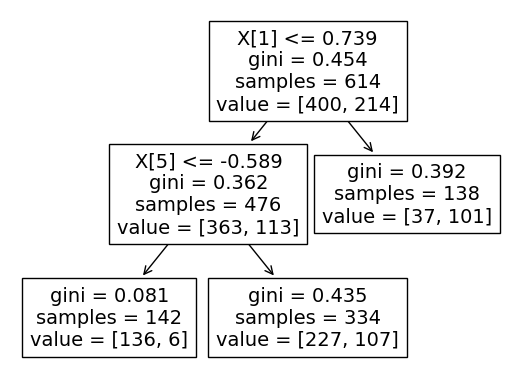

In [ ]:
tree.plot_tree(dt_clf_best_2)

Boosting

In [ ]:
boost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), random_state=seed)
boost_clf_2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), random_state=seed)

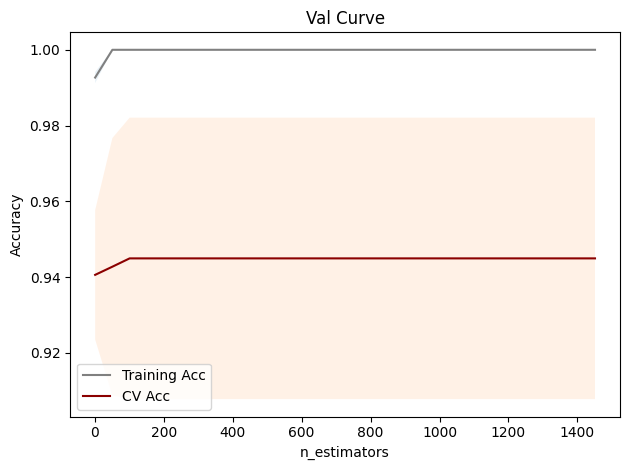

Best parameter values: 
[ 101  151  201  251  301  351  401  451  501  551  601  651  701  751
  801  851  901  951 1001 1051 1101 1151 1201 1251 1301 1351 1401 1451]


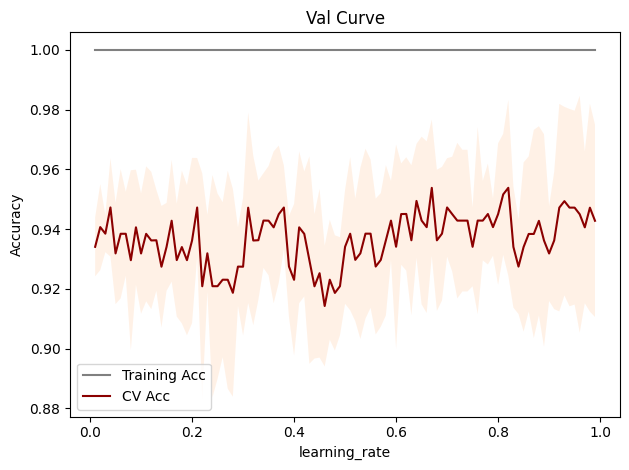

Best parameter values: 
[]


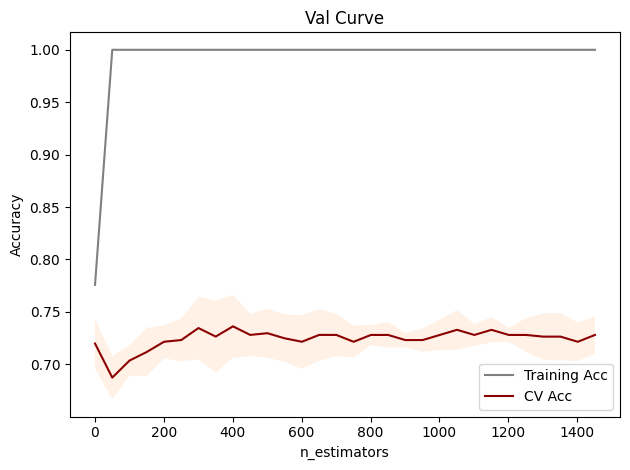

Best parameter values: 
[401]


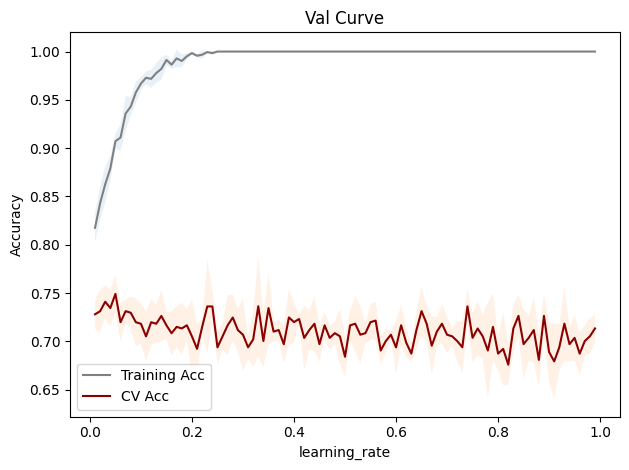

Best parameter values: 
[]


In [ ]:
val_curve(boost_clf, X_1_train, y_1_train,param_name="n_estimators", param_range=np.arange(1, 1500, 50), cv=4)
val_curve(boost_clf, X_1_train, y_1_train,param_name="learning_rate", param_range=np.arange(0, 1, 0.01), cv=4)

val_curve(boost_clf_2, X_2_train, y_2_train,param_name="n_estimators", param_range=np.arange(1, 1500, 50), cv=4)
val_curve(boost_clf_2, X_2_train, y_2_train,param_name="learning_rate", param_range=np.arange(0, 1, 0.01), cv=4)

In [9]:
boost_clf_best = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, ccp_alpha = 0.0055555, random_state=seed), n_estimators= 101, learning_rate = 0.9, random_state=seed)
boost_clf_best_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, ccp_alpha = 0.02222222, random_state=seed), n_estimators= 401, learning_rate = 0.05, random_state=seed)

start_time = time.time()
boost_clf_best.fit(X_1_train, y_1_train)
end_time = time.time()
training_time[1] = end_time-start_time

start_time = time.time()
y_pred = boost_clf_best.predict(X_1_test)
end_time = time.time()
inference_time[1] = end_time-start_time


start_time = time.time()
boost_clf_best_2.fit(X_2_train, y_2_train)
end_time = time.time()
training_time_2[1] = end_time-start_time

start_time = time.time()
y_pred_2 = boost_clf_best_2.predict(X_2_test)
end_time = time.time()
inference_time_2[1] = end_time-start_time

In [ ]:
evaluate(y_pred, y_1_test)
evaluate(y_pred_2, y_2_test)

Accuracy: 0.982
f1: 0.986
recall: 0.986
precision: 0.986
rocauc: 0.981
[[41  1]
 [ 1 71]]
Accuracy: 0.740
f1: 0.500
recall: 0.769
precision: 0.370
rocauc: 0.752
[[94 34]
 [ 6 20]]


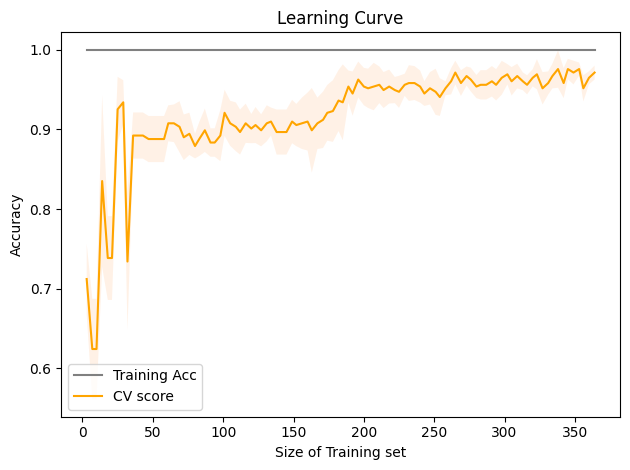

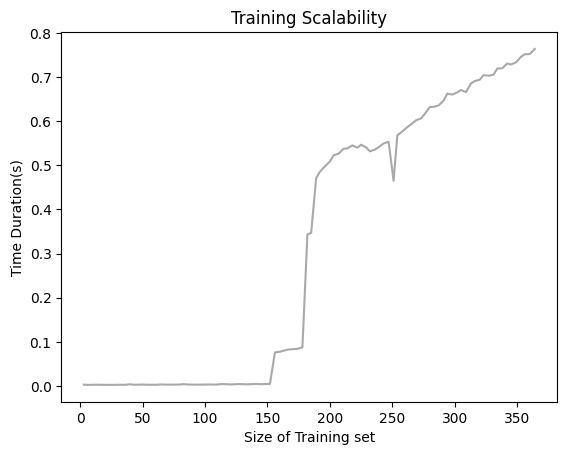

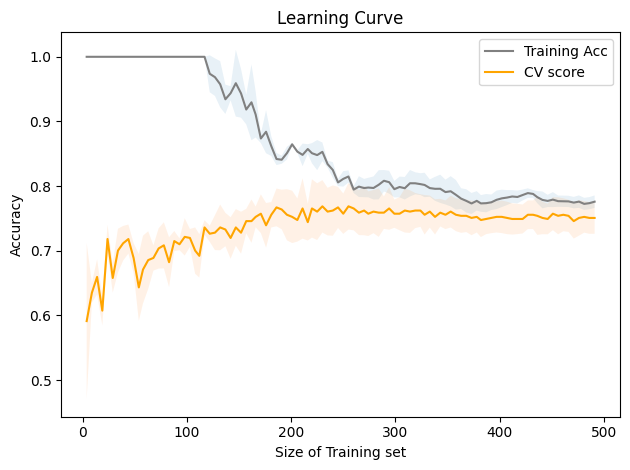

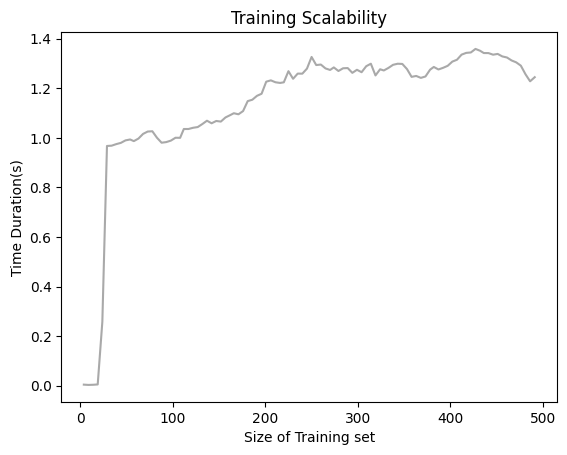

In [ ]:
LR_curve(boost_clf_best, X_1_train, y_1_train)
LR_curve(boost_clf_best_2, X_2_train, y_2_train)

Neural networks

In [10]:
# nn_clf = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', random_state=seed)
# nn_clf_single = MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', random_state=seed)
param_grid = {'alpha': np.logspace(-3,3,10), 'learning_rate_init': np.logspace(-5,1,10)}
nn_clf = GridSearchCV(MLPClassifier(random_state=seed, max_iter = 500), param_grid=param_grid, cv=4)


In [11]:
start_time = time.time()
nn_clf.fit(X_1_train, y_1_train)
end_time = time.time()
training_time[2] = end_time-start_time
start_time = time.time()
y_pred = accuracy_score(y_1_test, nn_clf.predict(X_1_test))
end_time = time.time()
inference_time[2] = end_time-start_time


start_time = time.time()
nn_clf.fit(X_2_train, y_2_train)
end_time = time.time()
training_time_2[2] = end_time-start_time

start_time = time.time()
y_pred_2 = accuracy_score(y_2_test, nn_clf.predict(X_2_test))
end_time = time.time()
inference_time_2[2] = end_time-start_time


In [ ]:
print(training_time)
print(inference_time)
print(training_time_2)
print(inference_time_2)

[7.01379776e-03 5.51800728e-01 1.01861725e+02 0.00000000e+00
 0.00000000e+00]
[0.00030422 0.011868   0.00084186 0.         0.        ]
[1.35612488e-03 8.09674025e-01 1.12091244e+02 0.00000000e+00
 0.00000000e+00]
[0.00018573 0.04965901 0.00093603 0.         0.        ]


In [ ]:
nn_clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

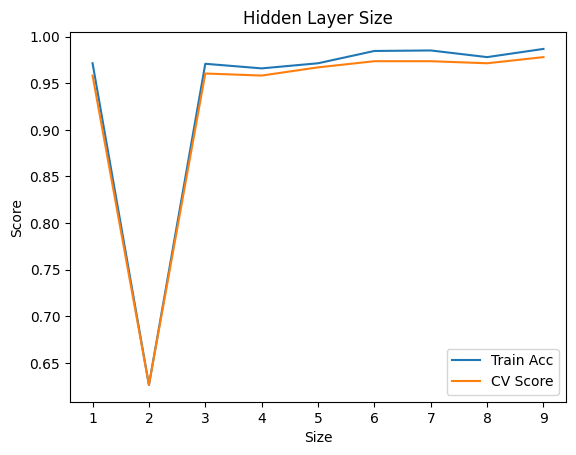

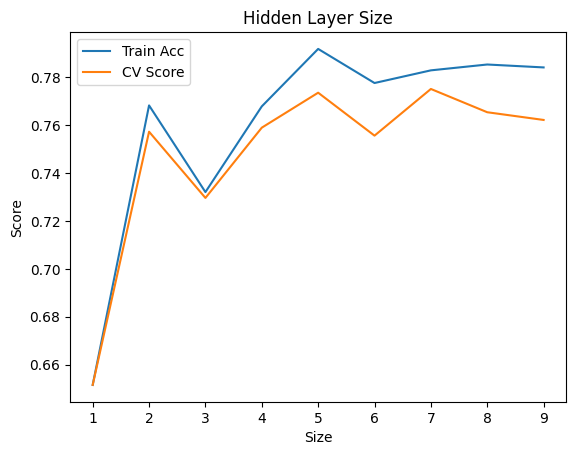

In [ ]:
nn_clf = MLPClassifier(activation='relu', random_state=seed)
# layer size
train_scores, test_scores = validation_curve(nn_clf, X_1_train, y_1_train, param_name="hidden_layer_sizes", param_range=np.arange(1 ,10, 1), cv=5)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1 ,10, 1), np.mean(train_scores, axis=1), label='Train Acc')
plt.plot(np.arange(1 ,10, 1), np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Hidden Layer Size")
plt.xlabel("Size")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(1,10,1))
plt.show()


train_scores, test_scores = validation_curve(nn_clf, X_2_train, y_2_train, param_name="hidden_layer_sizes", param_range=np.arange(1, 10, 1), cv=5)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1 ,10, 1), np.mean(train_scores, axis=1), label='Train Acc')
plt.plot(np.arange(1 ,10, 1), np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Hidden Layer Size")
plt.xlabel("Size")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(1,10,1))
plt.show()

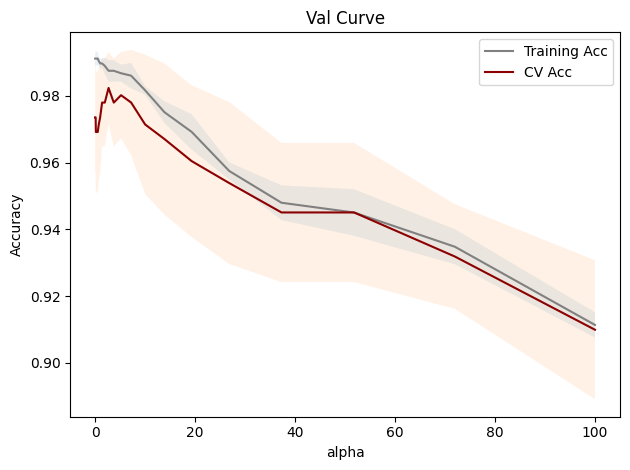

Best parameter values: 
[2.6826958]


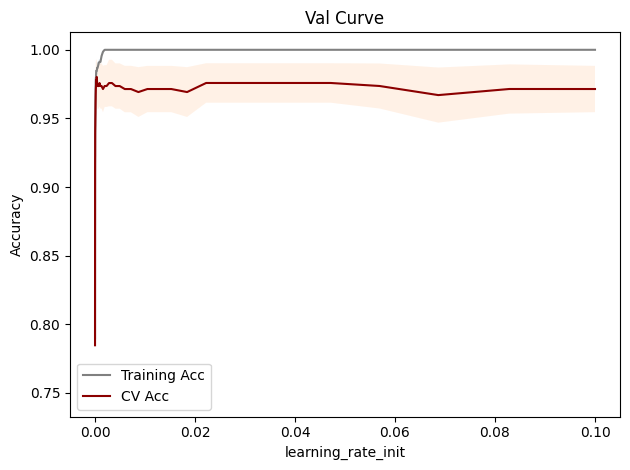

Best parameter values: 
[0.00035565]


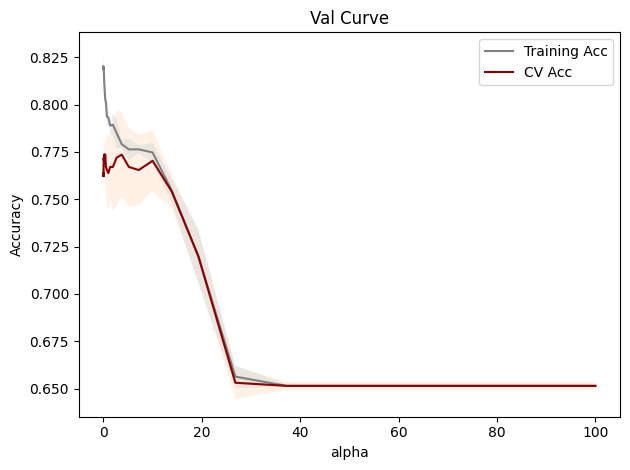

Best parameter values: 
[0.19306977]


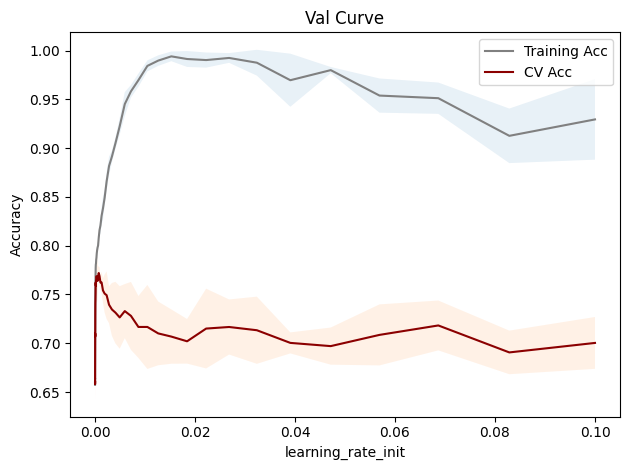

Best parameter values: 
[0.00075431]


In [73]:
nn_clf = MLPClassifier(activation='relu', random_state=seed)

val_curve(nn_clf, X_1_train, y_1_train, param_name="alpha", param_range=np.logspace(-5, 2, 50), cv=4)
val_curve(nn_clf, X_1_train, y_1_train, param_name="learning_rate_init", param_range=np.logspace(-5, -1, 50), cv=4)

val_curve(nn_clf, X_2_train, y_2_train, param_name="alpha", param_range=np.logspace(-5, 2, 50), cv=4)
val_curve(nn_clf, X_2_train, y_2_train, param_name="learning_rate_init", param_range=np.logspace(-5, -1, 50), cv=4)

In [90]:
# LR_curve(nn_clf_best, X_1_train, y_1_train, cv = 4)
# LR_curve(nn_clf_best_2, X_2_train, y_2_train, cv = 4)

In [86]:
nn_clf_best = MLPClassifier(max_iter=2000, activation = 'relu', random_state= seed, learning_rate_init = 0.00035565, alpha = 2.6826958, hidden_layer_sizes = 7)
nn_clf_best_2 = MLPClassifier(max_iter=2000, activation = 'relu', random_state= seed, learning_rate_init = 0.00075431 , alpha = 0.19306977 , hidden_layer_sizes = 7)

In [87]:
nn_clf_best.fit(X_1_train, y_1_train)
print(confusion_matrix(y_1_test, nn_clf_best.predict(X_1_test)))
print(accuracy_score(y_1_test, nn_clf_best.predict(X_1_test)))
print(f1_score(y_1_test, nn_clf_best.predict(X_1_test)))

nn_clf_best_2.fit(X_2_train, y_2_train)
print(confusion_matrix(y_2_test, nn_clf_best_2.predict(X_2_test)))
print(accuracy_score(y_2_test, nn_clf_best_2.predict(X_2_test)))
print(f1_score(y_2_test, nn_clf_best_2.predict(X_2_test)))


[[41  1]
 [ 1 71]]
0.9824561403508771
0.9861111111111112
[[92  8]
 [27 27]]
0.7727272727272727
0.6067415730337079


0.9824561403508771 0.9861111111111112 0.9811507936507937


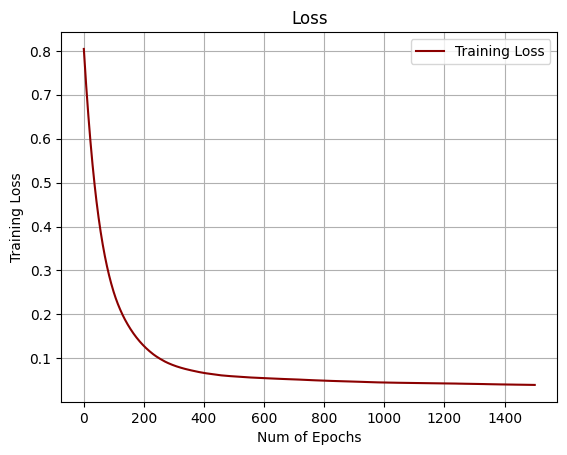

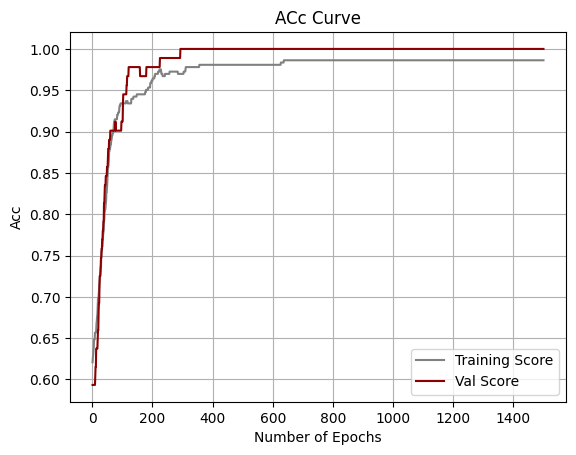

In [85]:
nn_clf_best = MLPClassifier(warm_start=True, max_iter=1, activation = 'relu', random_state= seed, learning_rate_init = 0.00035565, alpha = 2.6826958, hidden_layer_sizes = 7)

X_train_ml, X_val, y_train_ml, y_val = train_test_split(X_1_train, y_1_train, test_size=0.2, random_state=seed)
X_train_ml_2, X_val_2, y_train_ml_2, y_val_2 = train_test_split(X_2_train, y_2_train, test_size=0.2, random_state=seed)

epochs = 1500
loss_training = np.zeros(epochs)
score_training = np.zeros(epochs)
score_validation = np.zeros(epochs)


for epoch in range(epochs):
    nn_clf_best.fit(X_train_ml, y_train_ml)
    
    score_training[epoch] = accuracy_score(y_train_ml, nn_clf_best.predict(X_train_ml))
    score_validation[epoch] = accuracy_score(y_val, nn_clf_best.predict(X_val))
    
    loss_training[epoch] = nn_clf_best.loss_
    
score_test = accuracy_score(y_1_test, nn_clf_best.predict(X_1_test))
f1_test = f1_score(y_1_test, nn_clf_best.predict(X_1_test))
rocauc_test = roc_auc_score(y_1_test, nn_clf_best.predict(X_1_test))
print(score_test, f1_test, rocauc_test)

plt.figure()
plt.plot(np.arange(epochs)+1, loss_training, label='Training Loss', color = 'darkred')
plt.legend()
plt.title("Loss")
plt.xlabel("Num of Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(np.arange(epochs)+1, score_training, label='Training Score', color = 'grey')
plt.plot(np.arange(epochs)+1, score_validation, label='Val Score', color = 'darkred')
plt.legend()
plt.title("ACc Curve")
plt.xlabel("Number of Epochs")
plt.ylabel("Acc")
plt.grid()
plt.show()
    

0.7857142857142857 0.6732673267326733 0.7498148148148148


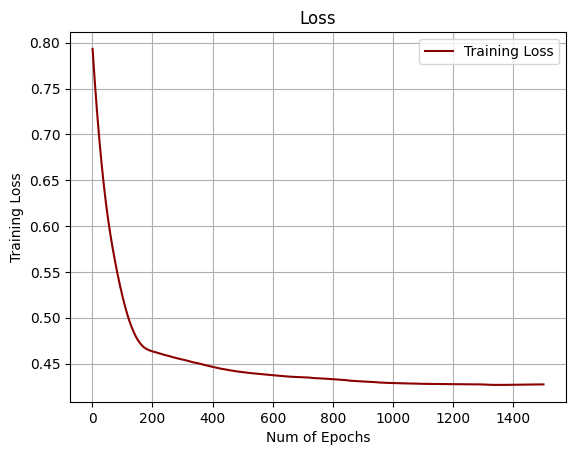

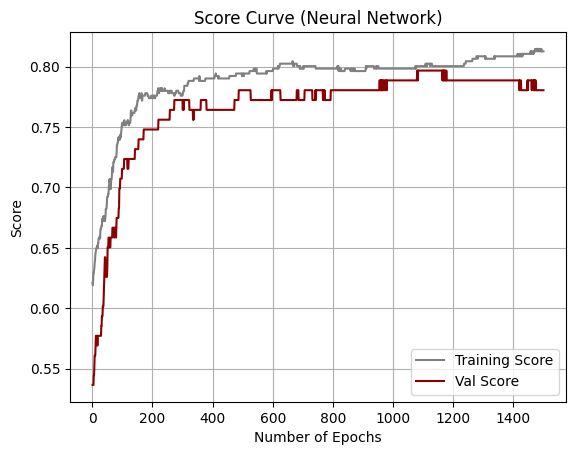

In [78]:
nn_clf_best_2 = MLPClassifier(warm_start=True, max_iter=1, activation = 'relu', random_state= seed, learning_rate_init = 0.00075431 , alpha = 0.19306977 , hidden_layer_sizes = 7)
X_train_ml_2, X_val_2, y_train_ml_2, y_val_2 = train_test_split(X_2_train, y_2_train, test_size=0.2, random_state=seed)


epochs = 1500
loss_training = np.zeros(epochs)
score_training = np.zeros(epochs)
score_validation = np.zeros(epochs)


for epoch in range(epochs):
    nn_clf_best_2.fit(X_train_ml_2, y_train_ml_2)
    
    score_training[epoch] = accuracy_score(y_train_ml_2, nn_clf_best_2.predict(X_train_ml_2))
    score_validation[epoch] = accuracy_score(y_val_2, nn_clf_best_2.predict(X_val_2))
    
    loss_training[epoch] = nn_clf_best_2.loss_
    
score_test = accuracy_score(y_2_test, nn_clf_best_2.predict(X_2_test))
f1_test = f1_score(y_2_test, nn_clf_best_2.predict(X_2_test))
rocauc_test = roc_auc_score(y_2_test, nn_clf_best_2.predict(X_2_test))
print(score_test, f1_test, rocauc_test)

plt.figure()
plt.plot(np.arange(epochs)+1, loss_training, label='Training Loss', color = 'darkred')
plt.legend()
plt.title("Loss")
plt.xlabel("Num of Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(np.arange(epochs)+1, score_training, label='Training Score', color = 'grey')
plt.plot(np.arange(epochs)+1, score_validation, label='Val Score', color = 'darkred')
plt.legend()
plt.title("Score Curve (Neural Network)")
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.grid()
plt.savefig('bc_neural_network_score_curve.png')
plt.show()

SVM

In [12]:
param_grid = {'C': np.logspace(-4, 0, 5), 'gamma':  np.logspace(-3, 0, 5), 'kernel': ['linear', 'rbf', 'sigmoid']}
svm_best = GridSearchCV(SVC(random_state=seed), param_grid = param_grid, scoring='accuracy', n_jobs=-1,  cv=5)
svm_best_2 = GridSearchCV(SVC(random_state=seed), param_grid = param_grid, scoring='accuracy', n_jobs=-1,  cv=5)
        

In [13]:
start_time = time.time()
svm_best.fit(X_1_train, y_1_train)
end_time = time.time() 
training_time[3] = end_time-start_time
print("Best params for SVM:", svm_best.best_params_)

start_time = time.time()
y_pred = accuracy_score(y_1_test, svm_best.predict(X_1_test))
end_time = time.time()
inference_time[3] = end_time-start_time


start_time = time.time()
svm_best_2.fit(X_2_train, y_2_train)
end_time = time.time() 
training_time_2[3] = end_time-start_time
print("Best params for SVM2:", svm_best_2.best_params_)

start_time = time.time()
y_pred_2 = accuracy_score(y_2_test, svm_best_2.predict(X_2_test))
end_time = time.time()
inference_time_2[3] = end_time-start_time

# Best params for SVM: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
# Best params for SVM2: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}

Best params for SVM: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best params for SVM2: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}


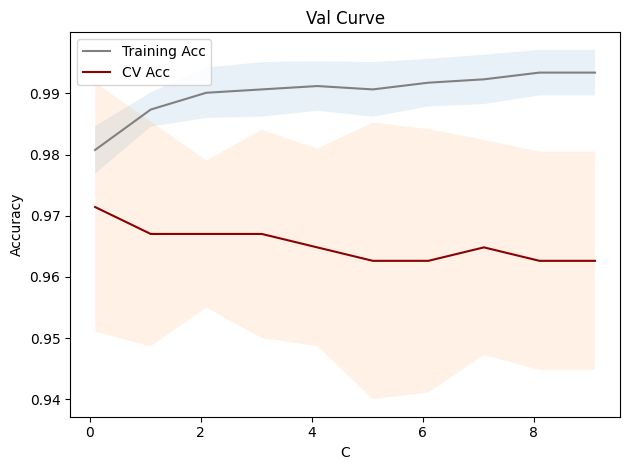

Best parameter values: 
[]


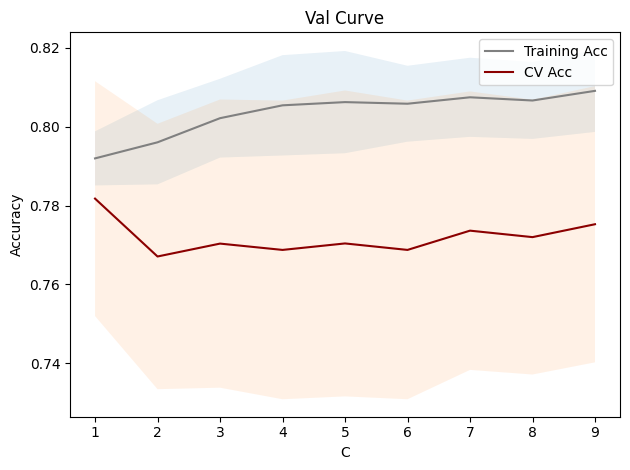

Best parameter values: 
[]


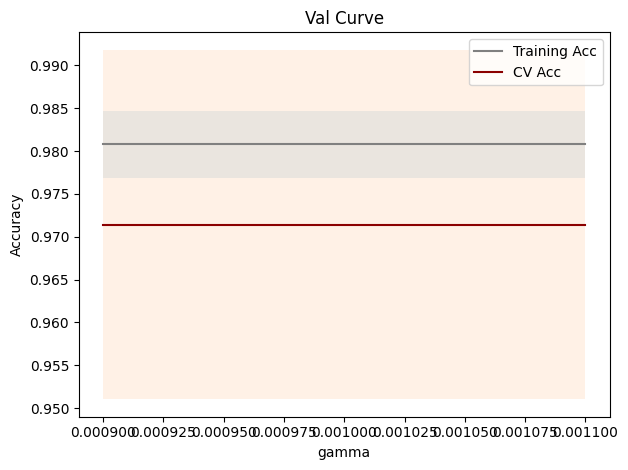

Best parameter values: 
[0.0009     0.00092222 0.00094444 0.00096667 0.00098889 0.00101111
 0.00103333 0.00105556 0.00107778 0.0011    ]


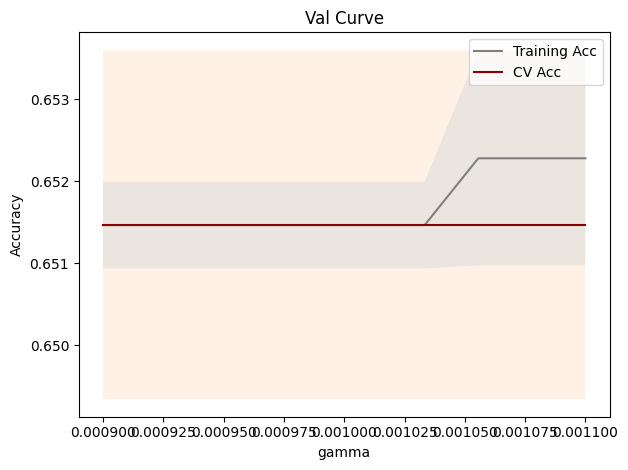

Best parameter values: 
[0.0009     0.00092222 0.00094444 0.00096667 0.00098889 0.00101111
 0.00103333 0.00105556 0.00107778 0.0011    ]


In [ ]:
svm = SVC(C= 0.1, gamma=0.001, kernel= 'linear')
svm_2 = SVC(C= 1.0, gamma=0.03162277660168379, kernel= 'rbf')

val_curve(svm, X_1_train, y_1_train, "C", np.arange(0.1-10, 0.1+10, 1))
val_curve(svm_2, X_2_train, y_2_train, "C", np.arange(0, 10, 1))

val_curve(svm, X_1_train, y_1_train, "gamma", np.linspace(0.9*0.001,1.1*0.001,10))
val_curve(svm_2, X_2_train, y_2_train, "gamma", np.linspace(0.9*0.001,1.1*0.001,10))

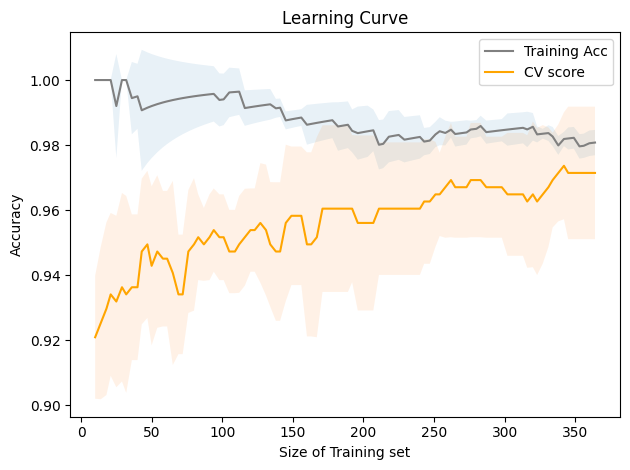

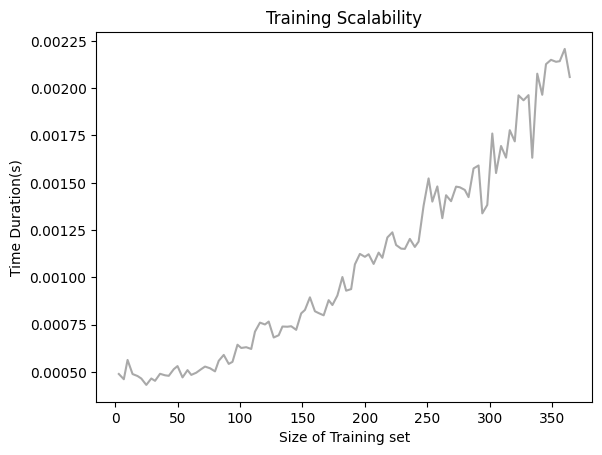

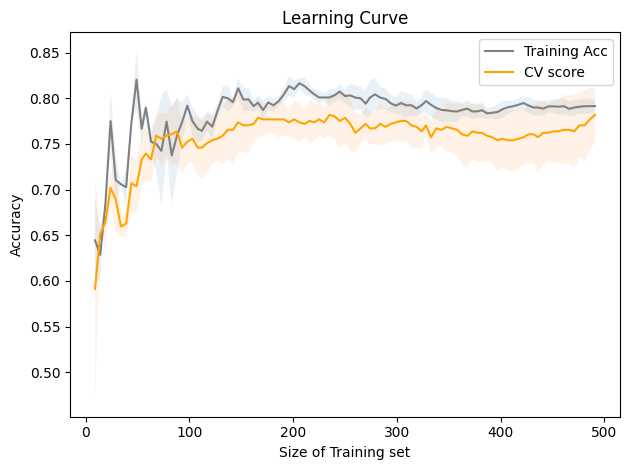

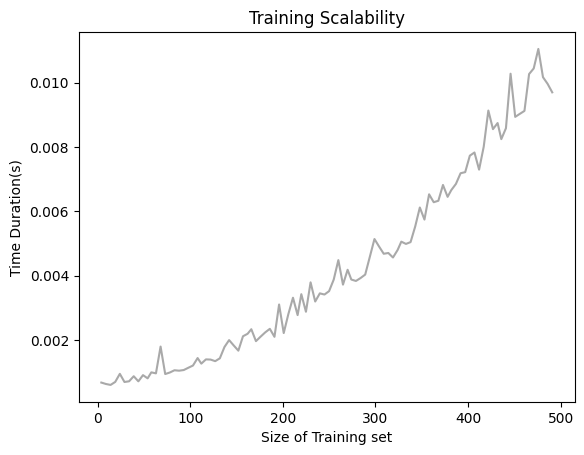

In [ ]:
LR_curve(svm, X_1_train, y_1_train, cv = 5)
LR_curve(svm_2, X_2_train, y_2_train, cv = 5)

In [14]:
print(confusion_matrix(y_1_test, svm_best.predict(X_1_test)))
print(accuracy_score(y_1_test, svm_best.predict(X_1_test)))
print(f1_score(y_1_test, svm_best.predict(X_1_test)))

print(confusion_matrix(y_2_test, svm_best_2.predict(X_2_test)))
print(accuracy_score(y_2_test, svm_best_2.predict(X_2_test)))
print(f1_score(y_2_test, svm_best_2.predict(X_2_test)))

[[40  2]
 [ 1 71]]
0.9736842105263158
0.9793103448275863
[[93  7]
 [28 26]]
0.7727272727272727
0.5977011494252873


KNN

In [54]:
param_grid = {'n_neighbors': np.arange(1, 51),  'p':np.arange(1, 6)}

knn_best = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
knn_best_2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
knn_best.fit(X_1_train, y_1_train)
end_time = time.time()
training_time[4] = end_time-start_time
print("Best params for KNN:", knn_best.best_params_)

start_time = time.time()
y_pred = accuracy_score(y_1_test, knn_best.predict(X_1_test))
end_time = time.time()
inference_time[4] = end_time-start_time


start_time = time.time()
knn_best_2.fit(X_2_train, y_2_train)
end_time = time.time() 
training_time_2[4] = end_time-start_time
print("Best params for KNN_2:", knn_best_2.best_params_)

start_time = time.time()
y_pred_2 = accuracy_score(y_2_test, knn_best_2.predict(X_2_test))
end_time = time.time()
inference_time_2[4] = end_time-start_time


Best params for KNN: {'n_neighbors': 4, 'p': 1}
Best params for KNN_2: {'n_neighbors': 15, 'p': 1}


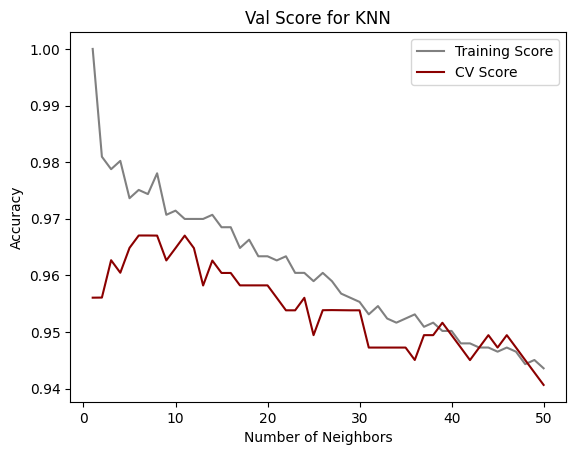

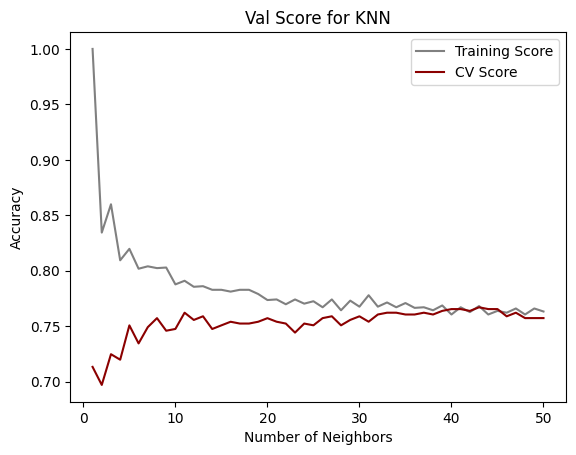

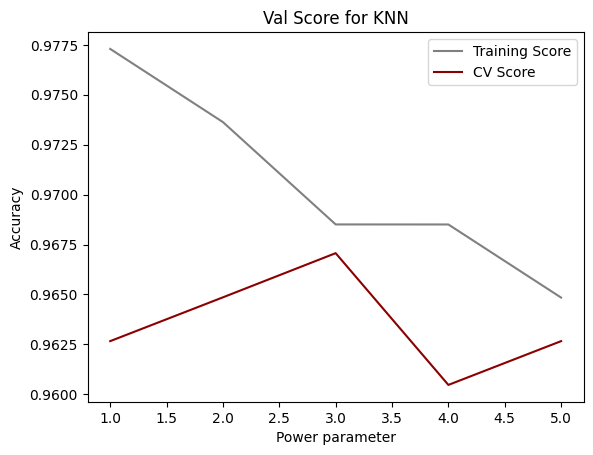

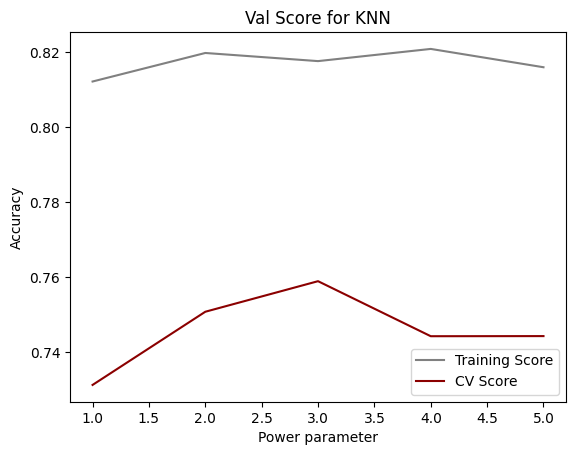

In [55]:
classifier_knn = KNeighborsClassifier()
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_1_train, y_1_train, param_range=np.arange(1, 51), param_name='n_neighbors', cv=4)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1, 51), np.mean(train_scores, axis=1), label='Training Score', color = 'grey')
plt.plot(np.arange(1, 51), np.mean(test_scores, axis=1), label='CV Score', color = 'darkred')
plt.legend()
plt.title("Val Score for KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_2_train, y_2_train, param_range=np.arange(1, 51), param_name='n_neighbors', cv=4)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1, 51), np.mean(train_scores, axis=1), label='Training Score', color = 'grey')
plt.plot(np.arange(1, 51), np.mean(test_scores, axis=1), label='CV Score', color = 'darkred')
plt.legend()
plt.title("Val Score for KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


classifier_knn = KNeighborsClassifier()
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_1_train, y_1_train, param_range=np.arange(1, 6), param_name='p', cv=4)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1, 6), np.mean(train_scores, axis=1), label='Training Score',  color = 'grey')
plt.plot(np.arange(1, 6), np.mean(test_scores, axis=1), label='CV Score', color = 'darkred')
plt.legend()
plt.title("Val Score for KNN")
plt.xlabel("Power parameter")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_2_train, y_2_train, param_range=np.arange(1, 6), param_name='p', cv=4)

plt.figure()
plt.grid(None)
plt.plot(np.arange(1, 6), np.mean(train_scores, axis=1), label='Training Score', color = 'grey')
plt.plot(np.arange(1, 6), np.mean(test_scores, axis=1), label='CV Score', color = 'darkred')
plt.legend()
plt.title("Val Score for KNN")
plt.xlabel("Power parameter")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



In [26]:
print(confusion_matrix(y_1_test, knn_best.predict(X_1_test)))
print(accuracy_score(y_1_test, knn_best.predict(X_1_test)))
print(f1_score(y_1_test, knn_best.predict(X_1_test)))

print(confusion_matrix(y_2_test, knn_best_2.predict(X_2_test)))
print(accuracy_score(y_2_test, knn_best_2.predict(X_2_test)))
print(f1_score(y_2_test, knn_best_2.predict(X_2_test)))


[[39  3]
 [ 1 71]]
0.9649122807017544
0.9726027397260274
[[87 13]
 [23 31]]
0.7662337662337663
0.6326530612244898


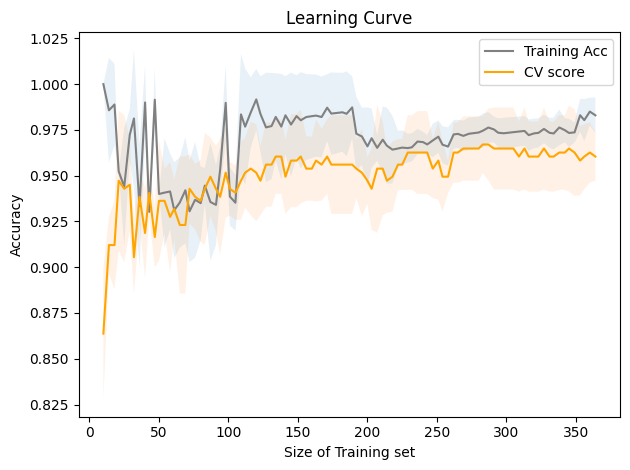

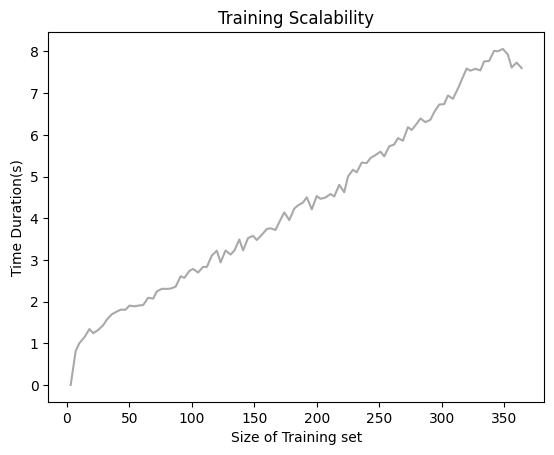

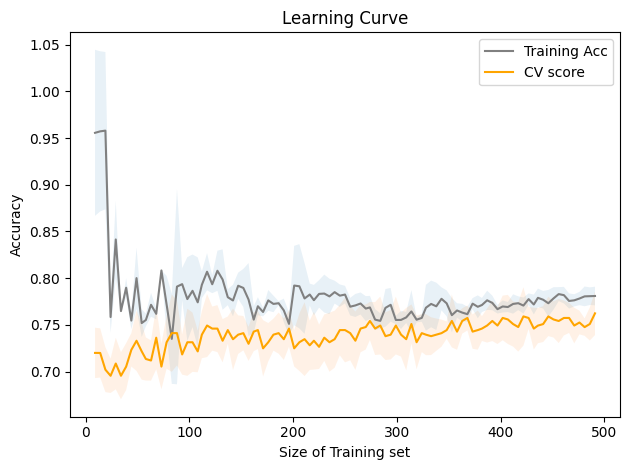

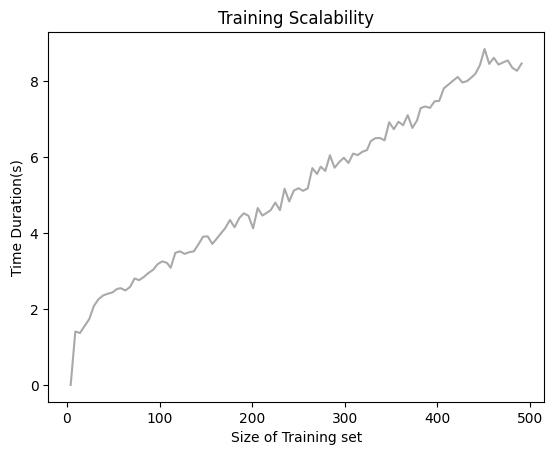

In [28]:
LR_curve(knn_best, X_1_train, y_1_train)
LR_curve(knn_best_2, X_2_train, y_2_train)

Time Comparison

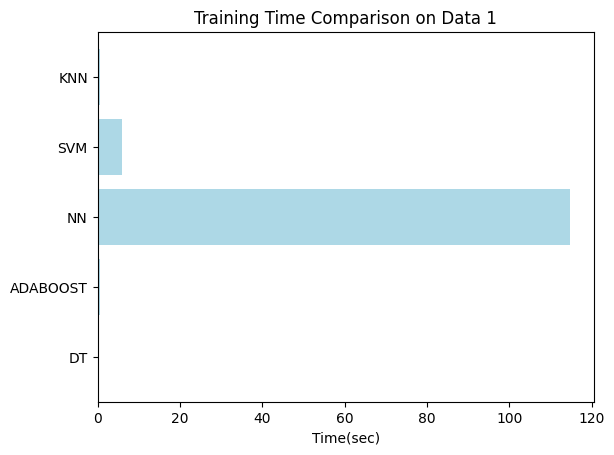

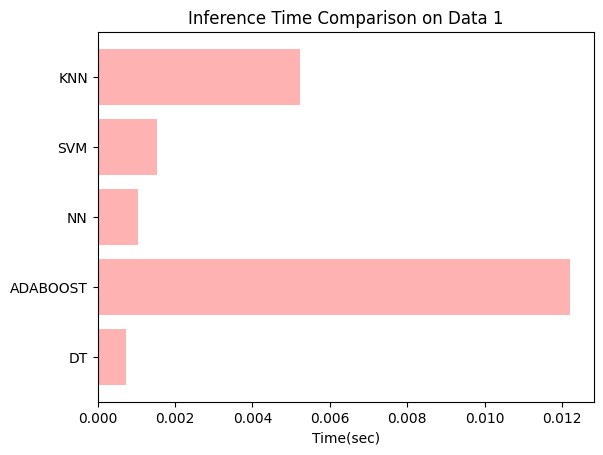

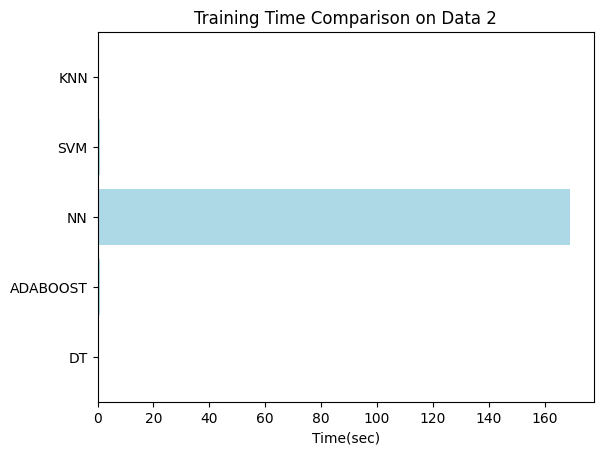

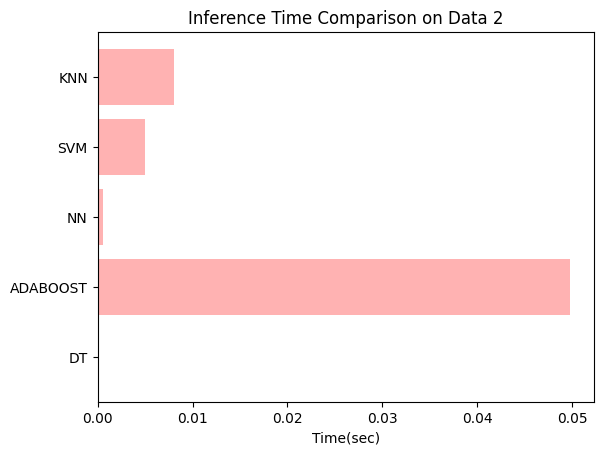

In [46]:
clf = ('DT', 'ADABOOST', 'NN', 'SVM', 'KNN')
y_ticks = np.arange(len(clf))

plt.figure()
plt.barh(y_ticks, training_time, color = 'lightblue')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(clf)
plt.title('Training Time Comparison on Data 1')
plt.xlabel('Time(sec)')
plt.show()


plt.figure()
plt.barh(y_ticks, inference_time, color = 'red', alpha = 0.3)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(clf)
plt.title('Inference Time Comparison on Data 1')
plt.xlabel('Time(sec)')
plt.show()


plt.figure()
plt.barh(y_ticks, training_time_2, color = 'lightblue')
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(clf)
plt.title('Training Time Comparison on Data 2')
plt.xlabel('Time(sec)')
plt.show()


plt.figure()
plt.barh(y_ticks, inference_time_2, color = 'red', alpha = 0.3)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(clf)
plt.title('Inference Time Comparison on Data 2')
plt.xlabel('Time(sec)')
plt.show()